In [2]:
%pip install "pandas[excel]"

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.2 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 653.3 kB/s eta 0:00:00
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     ---------------------------------------- 0.0/717.0 kB ? eta -:--:--
     --- ----------------------------------- 71.7/717.0 kB 1.9 MB/s eta 0:00:01
     ---------- --------------------------- 204.8/717.0 kB 3.1 MB/s eta 0:00:01
     ------------------ ------------------- 358.4/717.0 kB 3.2 MB/s eta 0:00:01
     ------------------------------------ - 686.1/717.0 kB 4.8 MB/s eta 0:00:01
     -------------------------------------- 717.0/717.0 kB 4.1 MB/s eta 0:00:00
  Installing build d

In [1]:
import pandas as pd

produzione_pv = pd.read_excel(...)
produzione_pv.shape

(4476, 101)

In [2]:
def convert_date(d):
    d = list(str(d))
    yy = "".join(d[0:4])
    mm = "".join(d[4:6])
    dd = "".join(d[6:8])
    reformatted = f"{dd}/{mm}/{yy}"

    return reformatted

produzione_pv["Data"] = produzione_pv["GIORNO_CDC"].apply(lambda x: convert_date(x))

produzione_pv["Data"] = pd.to_datetime(produzione_pv["Data"], dayfirst=True)

produzione_pv = produzione_pv.set_index("Data")

produzione_pv = produzione_pv.drop(["GIORNO_CDC", "ID_OBIS"], axis=1)

produzione_pv.head(3)

,POD,ID_TIPO_ORA,VALORE_01,VALORE_02,VALORE_03,VALORE_04,VALORE_05,VALORE_06,VALORE_07,VALORE_08,...,VALORE_88,VALORE_89,VALORE_90,VALORE_91,VALORE_92,VALORE_93,VALORE_94,VALORE_95,VALORE_96,PROVENIENZA
Data,,,,,,,,,,,,,,,,,,,,,
2010-12-22,ITP0AE00207625,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
2010-12-23,ITP0AE00207625,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
2010-12-24,ITP0AE00207625,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T


In [3]:
stat_produzione = produzione_pv.describe(include=["int64","float64"])
stat_produzione

,VALORE_01,VALORE_02,VALORE_03,VALORE_04,VALORE_05,VALORE_06,VALORE_07,VALORE_08,VALORE_09,VALORE_10,...,VALORE_87,VALORE_88,VALORE_89,VALORE_90,VALORE_91,VALORE_92,VALORE_93,VALORE_94,VALORE_95,VALORE_96
count,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,...,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.00000,4476.000000
mean,0.134905,0.134905,0.134912,0.134890,0.134906,0.134898,0.134905,0.134897,0.134918,0.134902,...,0.135764,0.135753,0.135769,0.135768,0.135764,0.135752,0.136283,0.136269,0.13629,0.136284
std,0.415057,0.415057,0.415068,0.415026,0.415057,0.415041,0.415056,0.415038,0.414793,0.414763,...,0.419116,0.419094,0.419125,0.419121,0.419115,0.419093,0.422538,0.422499,0.42255,0.422541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,3.592226,3.592226,3.592226,3.592226,3.592226,3.592226,3.592226,3.592226,3.592226,3.592226,...,3.713509,3.713509,3.713509,3.713509,3.713509,3.713509,5.396000,5.392000,5.39700,5.397000


In [5]:
produzione_pv['Tot_Produz_Giorno'] = produzione_pv.sum(axis=1, numeric_only=True)
produzione_pv

,POD,ID_TIPO_ORA,VALORE_01,VALORE_02,VALORE_03,VALORE_04,VALORE_05,VALORE_06,VALORE_07,VALORE_08,...,VALORE_89,VALORE_90,VALORE_91,VALORE_92,VALORE_93,VALORE_94,VALORE_95,VALORE_96,PROVENIENZA,Tot_Produz_Giorno
Data,,,,,,,,,,,,,,,,,,,,,
2010-12-22,ITP0AE00207625,S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,T,0.000
2010-12-23,ITP0AE00207625,S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,T,0.000
2010-12-24,ITP0AE00207625,S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,T,0.000
2010-12-25,ITP0AE00207625,S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,T,0.000
2010-12-26,ITP0AE00207625,S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,T,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,ITP0AE00207625,S,1.032,1.031,1.031,1.030,1.031,1.030,1.032,1.030,...,1.031,1.031,1.031,1.031,1.031,1.030,1.032,1.031,I,98.962
2023-02-25,ITP0AE00207625,S,1.031,1.031,1.031,1.030,1.031,1.031,1.031,1.030,...,1.031,1.031,1.032,1.030,1.031,1.031,1.031,1.031,I,98.961
2023-02-26,ITP0AE00207625,S,1.031,1.031,1.031,1.031,1.031,1.030,1.031,1.030,...,1.031,1.031,1.031,1.030,1.031,1.031,1.031,1.031,I,98.960


In [6]:
dettagli_produz = produzione_pv.loc[:, "VALORE_01":"VALORE_96"]#.plot(linewidth=0.8)

Text(0.5, 1.0, "Produzione complessiva per quarti d'ora")

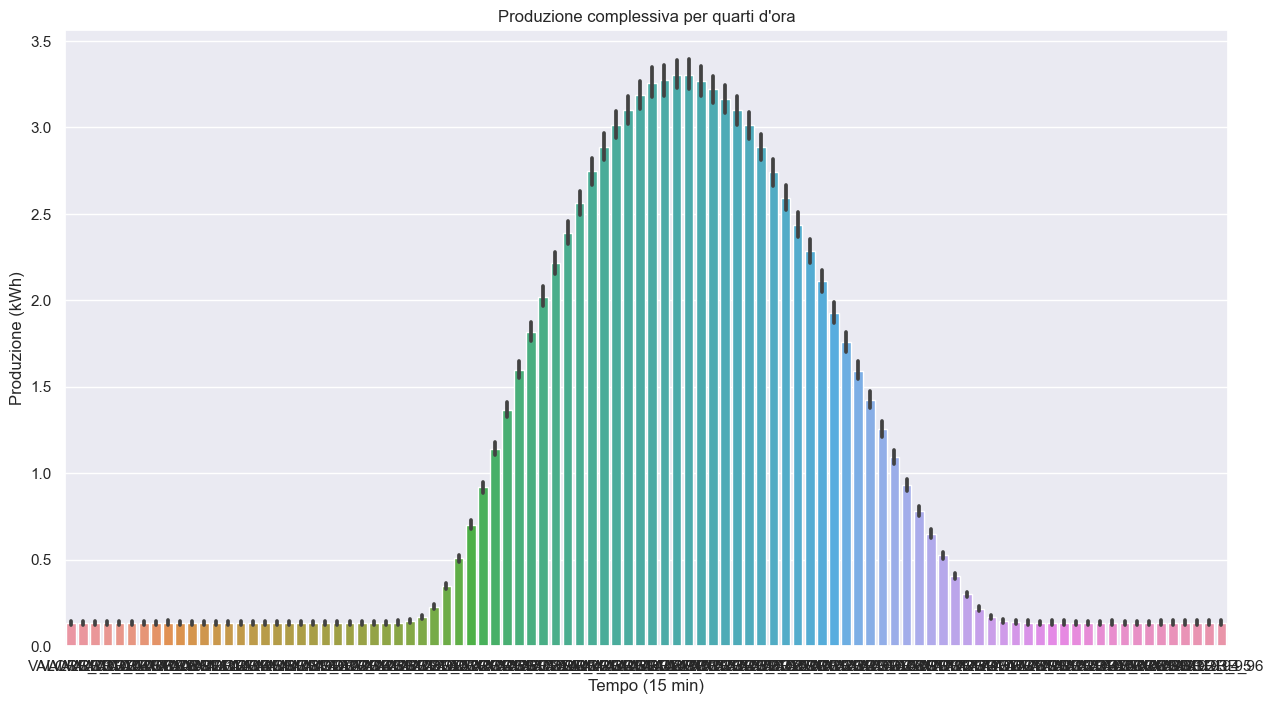

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(data=dettagli_produz)
plt.xlabel("Tempo (15 min)")
plt.ylabel("Produzione (kWh?)")
plt.title("Produzione complessiva per quarti d'ora")

In [7]:
max_produzione = produzione_pv['Tot_Produz_Giorno'].max()
min_produzione = produzione_pv['Tot_Produz_Giorno'].min()

print(f"produzione massima: {max_produzione} -- produzione minima: {min_produzione}")

giorno_max = produzione_pv[produzione_pv['Tot_Produz_Giorno'] == produzione_pv['Tot_Produz_Giorno'].max()]
print(f"Giornate con produzione massima ({len(giorno_max)}): \n")
print(giorno_max)

giorno_min = produzione_pv[produzione_pv['Tot_Produz_Giorno'] == produzione_pv['Tot_Produz_Giorno'].min()]
print(f"\n Giornate con produzione minima ({len(giorno_min)}): \n")
print(giorno_min)
giorno_min.to_csv("giornate_produz_minima.csv")

produzione massima: 352.6157635781599 -- produzione minima: 0.0
Giornate con produzione massima (3): 

                       POD ID_TIPO_ORA  VALORE_01  VALORE_02  VALORE_03  \
Data                                                                      
2016-06-04  ITP0AE00207625           L   3.592226   3.592226   3.592226   
2016-06-11  ITP0AE00207625           L   3.592226   3.592226   3.592226   
2016-06-18  ITP0AE00207625           L   3.592226   3.592226   3.592226   

            VALORE_04  VALORE_05  VALORE_06  VALORE_07  VALORE_08  ...  \
Data                                                               ...   
2016-06-04   3.592226   3.592226   3.592226   3.592226   3.592226  ...   
2016-06-11   3.592226   3.592226   3.592226   3.592226   3.592226  ...   
2016-06-18   3.592226   3.592226   3.592226   3.592226   3.592226  ...   

            VALORE_89  VALORE_90  VALORE_91  VALORE_92  VALORE_93  VALORE_94  \
Data                                                                  